<a href="https://colab.research.google.com/github/DomDigon/TelecomX2/blob/main/TelecomX_BR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)

#normalizando os arquivos Json e concatentando todas as colunas
df_customer = pd.json_normalize(dados['customer'])
df_phone = pd.json_normalize(dados['phone'])
df_internet = pd.json_normalize(dados['internet'])
df_account = pd.json_normalize(dados['account'])
df_dados = dados[['customerID' , 'Churn']]

df = df_dados.join(df_customer).join(df_phone).join(df_internet).join(df_account)



#🔧 Transformação

In [ ]:
#transformando a coluna Churn em booleano.
df['ChurnBool'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['SeniorCitizenYesNo'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df[df['customerID'].duplicated(keep=False)] # nao há customerID duplicado
df_genero = df.groupby('gender')['ChurnBool'].sum() #o numero de Mulheres e homens que evadiram é semelhante. Entao genero nao influencia na evasão

df_partner = df.groupby('Partner')['ChurnBool'].sum() #Clientes solteiros evadiram mais

df_Dependents = df.groupby('Dependents')['ChurnBool'].sum()#Clientes sem filhos evadiram mais
df_monthly = df.groupby('Charges.Monthly')['ChurnBool'].sum()#Clientes sem filhos evadiram mais

df_Senior = df.groupby('SeniorCitizenYesNo')['ChurnBool'].sum()#Clientes menores de 65 anos evadiram mais.
df_tenure = df.groupby('tenure')['ChurnBool'].sum() #quanto mais tempo de contrato tem o cliente, menor a chance de evadir
df_streamTV = df.groupby('StreamingTV')['ChurnBool'].sum() #O numero de clientes com streamingTV e sem tem um numero de evasoes semelhantes.
df_streamMovies = df.groupby('StreamingMovies')['ChurnBool'].sum() #O numero de clientes com streamingMovies e sem tem um numero de evasoes semelhantes.
df['Contas Diárias'] = df['Charges.Monthly']/12





#📊 Carga e análise

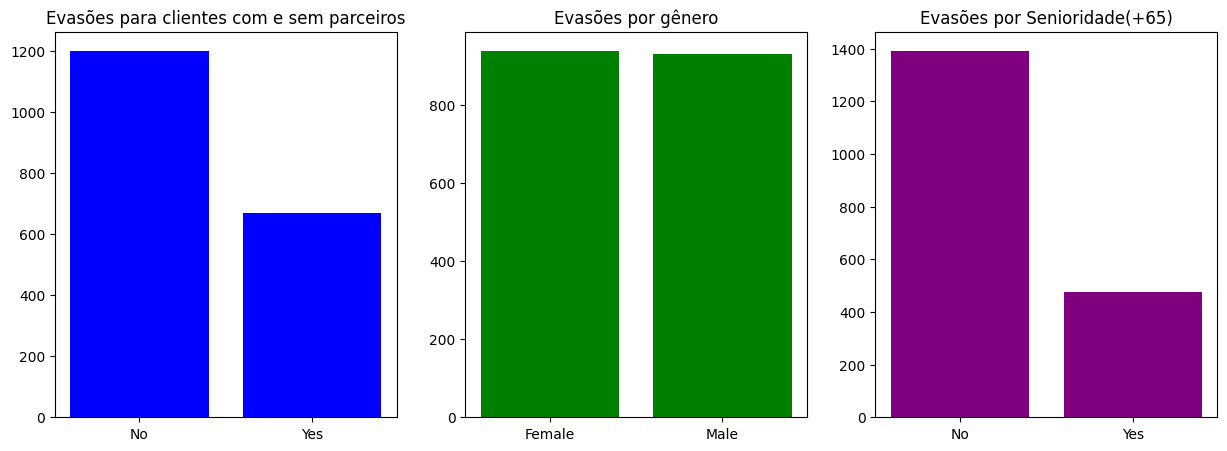

In [ ]:
fig, axes = plt.subplots(1 , 3, figsize=(15 , 5))
axes[0].bar(df_partner.index, df_partner.values, color='blue')
axes[0].set_title('Evasões para clientes com e sem parceiros')
axes[1].bar(df_genero.index, df_genero.values, color='green')
axes[1].set_title('Evasões por gênero')
axes[2].bar(df_Senior.index, df_Senior.values, color='purple')
axes[2].set_title('Evasões por Senioridade(+65)')
plt.show()

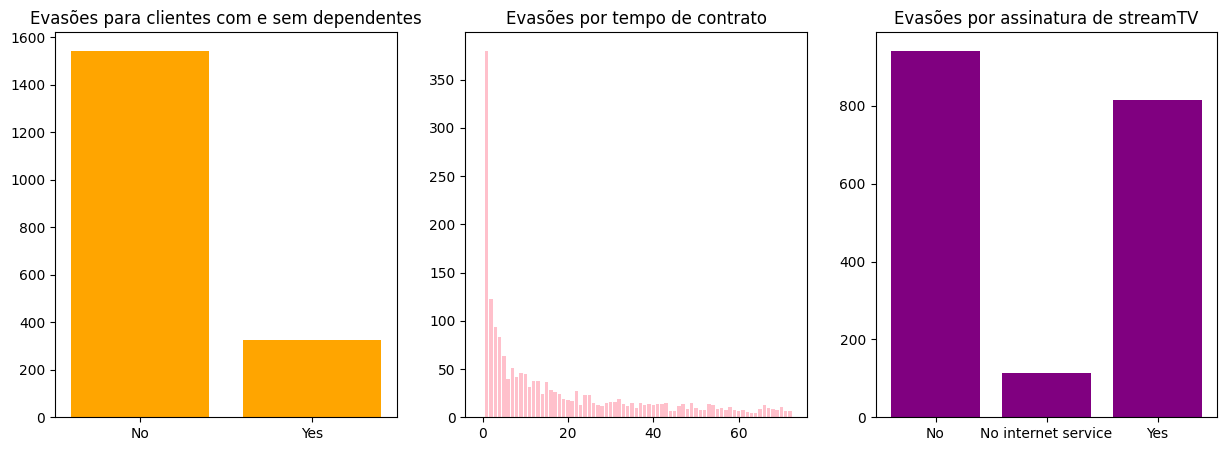

In [ ]:
fig, axes = plt.subplots(1 , 3, figsize=(15 , 5))
axes[0].bar(df_Dependents.index, df_Dependents.values, color='orange')
axes[0].set_title('Evasões para clientes com e sem dependentes')
axes[1].bar(df_tenure.index, df_tenure.values, color='pink')
axes[1].set_title('Evasões por tempo de contrato')
axes[2].bar(df_streamTV.index, df_streamTV.values, color='purple')
axes[2].set_title('Evasões por assinatura de streamTV')
plt.show()

Text(0.5, 1.0, 'Evasões para assinatura de streamMovies')

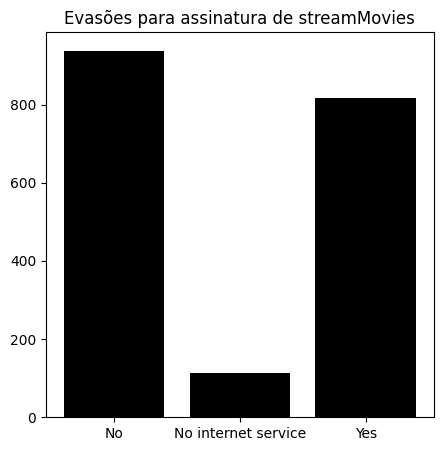

In [ ]:
fig, axes = plt.subplots(1 , 1, figsize=(5 , 5))
axes.bar(df_streamMovies.index, df_streamMovies.values, color='black')
axes.set_title('Evasões para assinatura de streamMovies')

#📄Relatorio Final

In [ ]:
'''
Introdução: Explique o objetivo da análise e o problema de evasão de clientes (Churn).
Objetivo: coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos.
A partir da análise, os demais colegas da  equipe de Data Science poderão avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

Limpeza e Tratamento de Dados: Descreva os passos realizados para importar, limpar e tratar os dados.

Transformei a coluna CHurn em booleano, assim, somando todos os 1, eu teria o número exato de clientes que evadiram.
Depois organizei as principais colunas em indexes e comparei com as evasões.

Análise Exploratória de Dados: Apresente as análises feitas, incluindo gráficos e visualizações para identificar padrões.
Foram apresentados os graficos que demonstram a conclusão informada abaixo.

Conclusões e Insights: Resuma os principais achados e como esses dados podem ajudar a reduzir a evasão.

Recomendações: Ofereça sugestões baseadas na sua análise.
De acordo com os dados adquiridos, o perfil de evasão é:
Clientes solteiros, sem filhos e menores de 65 anos. O Gênero não é fator determinante. Além disso, clientes com menos tempo de contrato tendem a evadir mais.
Acredito que para evitar a evasão devemos focar em marketing voltado para retenção dos clientes mais jovens
'''



'\nIntrodução: Explique o objetivo da análise e o problema de evasão de clientes (Churn).\nObjetivo: coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos.\nA partir da análise, os demais colegas da  equipe de Data Science poderão avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.\n\nLimpeza e Tratamento de Dados: Descreva os passos realizados para importar, limpar e tratar os dados.\n\nTransformei a coluna CHurn em booleano, assim, somando todos os 1, eu teria o número exato de clientes que evadiram.\nDepois organizei as principais colunas em indexes e comparei com as evasões.\n\nAnálise Exploratória de Dados: Apresente as análises feitas, incluindo gráficos e visualizações para identificar padrões.\nForam apresentados os graficos que demonstram a conclusão informada abaixo.\n\nConclusões e Insights: Resuma os principais achados e como esses dados podem ajudar a reduzir a evasão.\n\nRecomendaçõ

In [ ]:
df_novo = df.drop(columns=['Churn', 'customerID' , 'MultipleLines' ,'InternetService', 'OnlineBackup' , 'DeviceProtection' , 'Contract' , 'PaperlessBilling', 'TechSupport','OnlineSecurity', 'PhoneService', 'PaymentMethod', 'StreamingTV','StreamingMovies', 'SeniorCitizenYesNo' ])


In [ ]:
df_novo['Partner'] = df_novo['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df_novo['Dependents'] = df_novo['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
genero = df_novo[['gender']]


In [ ]:
genero_encoder = encoder.fit_transform(genero)

In [ ]:
genero_codificado = pd.DataFrame(genero_encoder.toarray(), columns= encoder.get_feature_names_out(['gender']))

In [ ]:
df_final = pd.concat([df_novo.drop('gender' , axis = 1) , genero_codificado], axis = 1)

In [ ]:
df_final_corrigido = df_final.replace(['' , ' '], np.nan)

In [ ]:
df_final = df_final_corrigido.dropna()


In [ ]:
valores_Churn = df_final['ChurnBool'].value_counts().reset_index()
valores_Churn

,ChurnBool,count
0,0,5387
1,1,1869


In [ ]:
churn_no = int(valores_Churn.loc[0, 'count'])
churn_yes = int(valores_Churn.loc[1, 'count'])

In [ ]:
proporcao_churn = (churn_yes / valores_Churn['count'].sum())

print(f'A proporção de evasões é: {proporcao_churn:.2%} de evasões ')

A proporção de evasões é: 25.76% de evasões 


In [ ]:
from sklearn.model_selection import train_test_split

y = df_final['ChurnBool']
X = df_final.drop(['ChurnBool'] , axis = 1)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,  random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(max_depth = 7, random_state =5)
arvore.fit(X_treino, y_treino)
arvore.predict(X_teste)
arvore.score(X_teste, y_teste)

0.7896187413872301

In [ ]:
matriz_correlacao = df_final.corr()

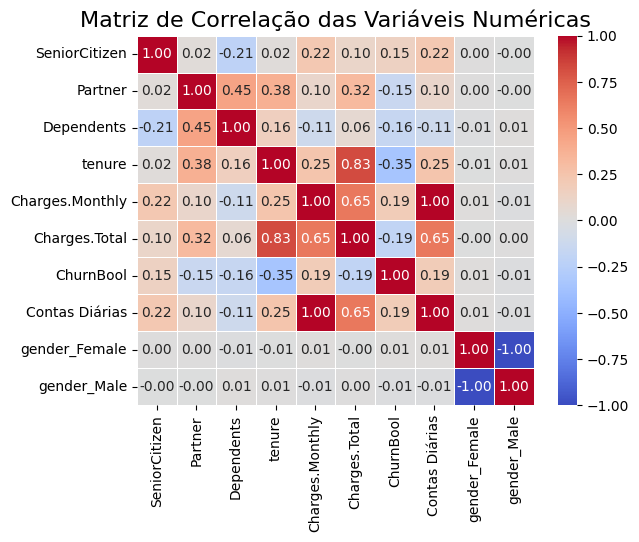

In [ ]:
sns.heatmap(matriz_correlacao,
            annot=True, # Mostra os valores de correlação nas células
            cmap='coolwarm', # Escolhe um mapa de cores
            fmt=".2f", # Formato do número com 2 casas decimais
            linewidths=.5) # Adiciona linhas entre as células

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

In [ ]:
correlacao_evasao = matriz_correlacao['ChurnBool'].sort_values(ascending=False)
print("\nCorrelação com a Evasão:")
print(correlacao_evasao)


Correlação com a Evasão:
ChurnBool          1.000000
Contas Diárias     0.189393
Charges.Monthly    0.189393
SeniorCitizen      0.146400
gender_Female      0.009494
gender_Male       -0.009494
Partner           -0.148106
Dependents        -0.160347
Charges.Total     -0.194440
tenure            -0.345799
Name: ChurnBool, dtype: float64


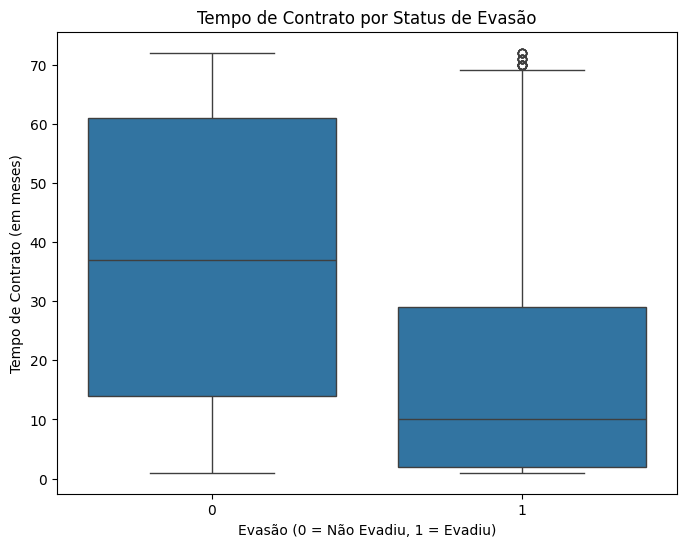

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df' é o seu DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(x='ChurnBool', y='tenure', data=df_final)
plt.title('Tempo de Contrato por Status de Evasão')
plt.xlabel('Evasão (0 = Não Evadiu, 1 = Evadiu)')
plt.ylabel('Tempo de Contrato (em meses)')
plt.show()

In [ ]:
# Verificar o tamanho de cada conjunto
print(f'Tamanho do conjunto de treino: {X_treino.shape}')
print(f'Tamanho do conjunto de teste: {X_teste.shape}')

Tamanho do conjunto de treino: (5079, 9)
Tamanho do conjunto de teste: (2177, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Normalizar os dados
scaler = StandardScaler()
X_treino_normalizado = scaler.fit_transform(X_treino)
X_teste_normalizado = scaler.transform(X_teste)

# 2. Instanciar e treinar o modelo
modelo_logreg = LogisticRegression(random_state=42)
modelo_logreg.fit(X_treino_normalizado, y_treino)

# 3. Fazer previsões
previsoes_logreg = modelo_logreg.predict(X_teste_normalizado)

# Exemplo: Avaliar a acurácia
acuracia_logreg = accuracy_score(y_teste, previsoes_logreg)
print(f"Acurácia da Regressão Logística: {acuracia_logreg:.2f}")

Acurácia da Regressão Logística: 0.80


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Instanciar e treinar o modelo
# 'n_estimators' define o número de árvores na floresta
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_treino, y_treino)

# 2. Fazer previsões
previsoes_rf = modelo_rf.predict(X_teste)

# Exemplo: Avaliar a acurácia
acuracia_rf = accuracy_score(y_teste, previsoes_rf)
print(f"Acurácia do Random Forest: {acuracia_rf:.2f}")

Acurácia do Random Forest: 0.79


--- Métricas de Avaliação ---
Acurácia: 0.80
Precisão: 0.68
Recall:   0.44
F1-Score: 0.53


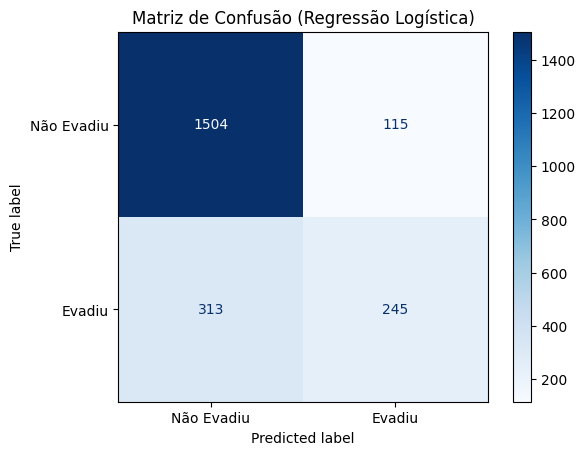

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supondo que 'y_teste' são os rótulos verdadeiros e
# 'previsoes_logreg' são as previsões do modelo de Regressão Logística.

# 1. Calcular as métricas
acuracia = accuracy_score(y_teste, previsoes_logreg)
precisao = precision_score(y_teste, previsoes_logreg)
recall = recall_score(y_teste, previsoes_logreg)
f1 = f1_score(y_teste, previsoes_logreg)

print("--- Métricas de Avaliação ---")
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall:   {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# 2. Gerar e visualizar a Matriz de Confusão
cm = confusion_matrix(y_teste, previsoes_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão (Regressão Logística)')
plt.show()

# Repita este bloco de código para o modelo de Random Forest
# substituindo 'previsoes_logreg' por 'previsoes_rf'.